In [4]:
import pandas as pd
import numpy as np


In [27]:
# Pandas basics - first look code
pd.set_option('display.width', 70)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format #decide display format

nls97 = pd.read_csv("data/nls97.csv")
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates = ['lastdate']) #parser changes the dtype to datetime[ns]

In [25]:
# Pandas axis = 1 means along columns and axis = 0 means along rows
covidtotals.shape
covidtotals.set_index("iso_code", inplace=True)

In [19]:
covidtotals.sample(2, random_state=1).T #prints two random samples 
print(covidtotals.dtypes)

lastdate           datetime64[ns]
location                   object
total_cases                 int64
total_deaths                int64
total_cases_pm            float64
total_deaths_pm           float64
population                float64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
dtype: object


In [22]:
# Basic stats
covidtotals.index
covidtotals.shape
covidtotals.index.nunique()
covidtotals.info()
covidtotals.sample(2, random_state=1).T

210

In [28]:
totvars = ['location', 'total_cases', 'total_deaths']
covidtotals[totvars].quantile(np.arange(0.0, 1.1, 0.1))

,total_cases,total_deaths
0.00,0.00,0.00
0.10,22.90,0.00
0.20,105.20,2.00
0.30,302.00,6.70
0.40,762.00,12.00
0.50,"1,242.50",25.50
0.60,"2,514.60",54.60
0.70,"6,959.80",137.20
0.80,"16,847.20",323.20
0.90,"46,513.10","1,616.90"


In [29]:
nls97.set_index("personid", inplace = True)

# Change dtypes where object to category
nls97.loc[:, nls97.dtypes == "object"] = nls97.select_dtypes(['object']). \
    apply(lambda x: x.astype("category"))


In [38]:
nls97.select_dtypes(include = ["category"]).isnull().sum()

gender                  0
maritalstatus        2312
weeklyhrscomputer    2274
weeklyhrstv          2273
highestdegree          31
                     ... 
colenroct15          1515
colenrfeb16          1948
colenroct16          2251
colenrfeb17          2251
colenroct17          2250
Length: 57, dtype: int64

In [41]:
nls97["maritalstatus"].value_counts(sort = "False")

Married          3066
Never-married    2766
Divorced          663
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

In [42]:
# Show percentages instead ofo counts
from locale import normalize


nls97.maritalstatus.value_counts(sort = "False", \
     normalize = True)

Married         0.46
Never-married   0.41
Divorced        0.10
Separated       0.02
Widowed         0.00
Name: maritalstatus, dtype: float64

In [45]:
# Show percentages of all gov responsibility columns starting with gov
nls97.filter(like = "gov").apply(pd.value_counts, normalize = True)

,govprovidejobs,govpricecontrols,...,govdecenthousing,govprotectenvironment
1. Definitely,0.25,0.54,...,0.44,0.67
2. Probably,0.34,0.33,...,0.43,0.29
3. Probably not,0.25,0.09,...,0.10,0.03
4. Definitely not,0.16,0.04,...,0.02,0.02


In [50]:
# Saving frequency distributions to a file
freqout = open('frequencies.txt', 'w')

for col in nls97.select_dtypes(["category"]):
    print(nls97[col].value_counts(sort = False), "frequencies", \
        nls97[col].value_counts(normalize = True, sort = False), \
            sep = "\n\n", end = "\n\n\n")

Female    4385
Male      4599
Name: gender, dtype: int64

frequencies

Female   0.49
Male     0.51
Name: gender, dtype: float64


Divorced          663
Married          3066
Never-married    2766
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

frequencies

Divorced        0.10
Married         0.46
Never-married   0.41
Separated       0.02
Widowed         0.00
Name: maritalstatus, dtype: float64


1 to 3 hours a week         733
10 hours or more a week    3669
4 to 6 hours a week         726
7 to 9 hours a week         368
Less than 1 hour a week     296
None                        918
Name: weeklyhrscomputer, dtype: int64

frequencies

1 to 3 hours a week       0.11
10 hours or more a week   0.55
4 to 6 hours a week       0.11
7 to 9 hours a week       0.05
Less than 1 hour a week   0.04
None                      0.14
Name: weeklyhrscomputer, dtype: float64


11 to 20 hours a week         1145
21 to 30 hours a week          299
3 to 10 hours a week       

In [54]:
demovars = ["population", "pop_density", "median_age",\
    "gdp_per_capita"]

covidtotals[demovars].isnull().sum(axis=1)

0      0
1      0
2      0
3      2
4      0
      ..
205    0
206    2
207    0
208    0
209    0
Length: 210, dtype: int64

In [56]:
# Filtering rows and columns to select subset of the data frame # Pandas magic
covidtotals.loc[covidtotals.gdp_per_capita < 6000, ["gdp_per_capita", "hosp_beds"]]

,gdp_per_capita,hosp_beds
0,"1,803.99",0.50
4,"5,819.49",NaN
15,"3,523.98",0.80
20,"2,064.24",0.50
31,"1,703.10",0.40
...,...,...
190,"1,429.81",0.70
195,"1,697.71",0.50
207,"1,479.15",0.70
208,"3,689.25",2.00


In [58]:
# Interpolating missing values
covidtotals.total_cases_pm.fillna(covidtotals.total_cases/(covidtotals.population/10000000), inplace=True)

In [66]:
# Identifying outliers for one variable, first check if the variable is distributed as a normal distribution
import statsmodels.api as sm
import scipy.stats as scistat
import matplotlib.pyplot as plt

totvars = ['location', 'total_cases', 'total_deaths']
covidtotalsonly = covidtotals[totvars].quantile(np.arange(0.0, 1.1, 0.1))

# Testing normality - if skew or kurtosis was very high then our data is not normally distributed
covidtotalsonly.skew()
covidtotalsonly.kurtosis()

# Shapiro-Wilk test to check for normality
def testnorm(var, df):
    stat, p = scistat.shapiro(df[var])
    return p

result = testnorm("total_cases", covidtotalsonly) 

print(result,"result is less than 0.05 therefore the variable is not normal", sep = "\t")


3.5217372129636715e-08	result


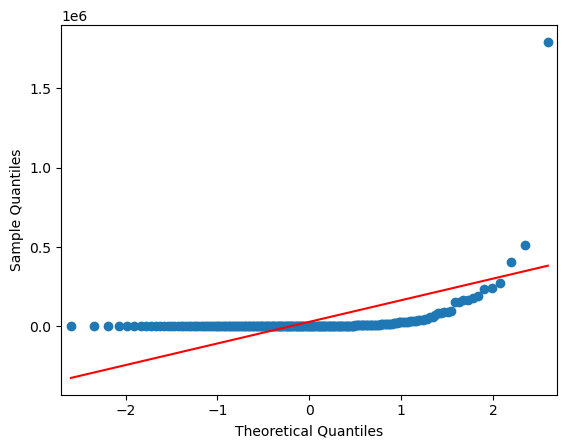

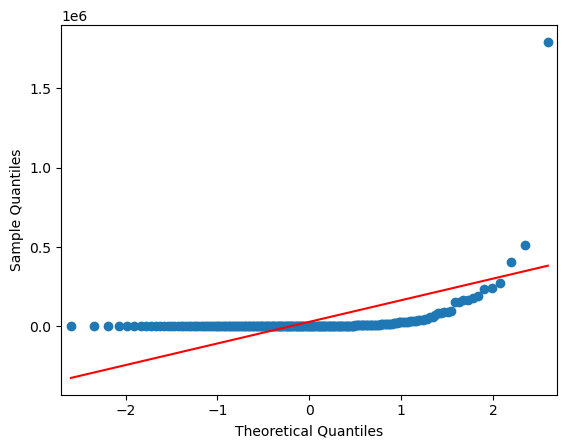

In [71]:
# Plot a normal quantile quantile plot 
sm.qqplot(covidtotals[["total_cases"]].sort_values(['total_cases']), line = 's')
# Since its away from the line the distribution is not normal


In [70]:
covidtotalsonly.total_cases

0.00           0.00
0.10          22.90
0.20         105.20
0.30         302.00
0.40         762.00
0.50       1,242.50
0.60       2,514.60
0.70       6,959.80
0.80      16,847.20
0.90      46,513.10
1.00   1,790,191.00
Name: total_cases, dtype: float64

In [98]:
# get outliers using interquartile range
def getoutliers(dfout):
    """Retruns dataframe without outliers along with outlier
    low and high values.
    
    Args:
        dfout (pd.DataFrame): input raw dataframe with continuous 
        variables.

    Returns:
        pd.DataFrame: returns filtered dataframe without any outliers
        for each column concatenated vertically.


    """

    dfresult = pd.DataFrame(columns = dfout.columns, data = None)

    for col in dfout.columns:
        thirdq, firstq = dfout[col].quantile(0.75),\
            dfout[col].quantile(0.25)
        
        interquartilerange = 1.5*(thirdq - firstq)

        outlierhigh, outlierlow = interquartilerange + thirdq, interquartilerange + firstq
        
        df = dfout[(dfout[col] > outlierlow) | (dfout[col] \
           < outlierhigh)]
        df = df.assign(varname = col, outlierlow = outlierlow, outlierhigh = outlierhigh)
        dfresult = pd.concat([dfresult, df])
        print(dfresult)

    return dfresult

totvars = ['gdp_per_capita', 'total_cases']
dfresult = getoutliers(covidtotals[totvars])


        

     gdp_per_capita total_cases         varname  outlierlow  \
0          1,803.99       15205  gdp_per_capita   40,592.13   
1         11,803.43        1137  gdp_per_capita   40,592.13   
2         13,913.84        9394  gdp_per_capita   40,592.13   
4          5,819.49          86  gdp_per_capita   40,592.13   
6         21,490.94          25  gdp_per_capita   40,592.13   
..              ...         ...             ...         ...   
204       16,745.02        1510  gdp_per_capita   40,592.13   
205        6,171.88         328  gdp_per_capita   40,592.13   
207        1,479.15         323  gdp_per_capita   40,592.13   
208        3,689.25        1057  gdp_per_capita   40,592.13   
209        1,899.78         178  gdp_per_capita   40,592.13   

     outlierhigh  
0      64,663.32  
1      64,663.32  
2      64,663.32  
4      64,663.32  
6      64,663.32  
..           ...  
204    64,663.32  
205    64,663.32  
207    64,663.32  
208    64,663.32  
209    64,663.32  

[182 rows x 5 

In [99]:
dfresult

,gdp_per_capita,total_cases,varname,outlierlow,outlierhigh
0,"1,803.99",15205,gdp_per_capita,"40,592.13","64,663.32"
1,"11,803.43",1137,gdp_per_capita,"40,592.13","64,663.32"
2,"13,913.84",9394,gdp_per_capita,"40,592.13","64,663.32"
4,"5,819.49",86,gdp_per_capita,"40,592.13","64,663.32"
6,"21,490.94",25,gdp_per_capita,"40,592.13","64,663.32"
...,...,...,...,...,...
205,"6,171.88",328,total_cases,"15,087.62","25,028.88"
206,NaN,23,total_cases,"15,087.62","25,028.88"
207,"1,479.15",323,total_cases,"15,087.62","25,028.88"
208,"3,689.25",1057,total_cases,"15,087.62","25,028.88"


In [100]:
# Outlier detection using bivariate relationships
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

# set up the cumulative and demographic columns
totvars = ['location','total_cases','total_deaths','total_cases_pm',
  'total_deaths_pm']

covidtotals.corr(method = "pearson")

,total_cases,total_deaths,...,gdp_per_capita,hosp_beds
total_cases,1.00,0.93,...,0.19,0.03
total_deaths,0.93,1.00,...,0.20,0.02
total_cases_pm,0.18,0.18,...,0.66,0.08
total_deaths_pm,0.25,0.39,...,0.39,0.12
population,0.27,0.21,...,-0.06,-0.04
pop_density,-0.03,-0.03,...,0.32,0.31
median_age,0.16,0.21,...,0.65,0.66
gdp_per_capita,0.19,0.20,...,1.00,0.30
hosp_beds,0.03,0.02,...,0.30,1.00


In [103]:
# get descriptive statistics on the cumulative values
covidtotalsonly = covidtotals.loc[:, totvars]

# see if some countires have unexpected low or high values
covidtotalsonly['total_cases_q'] = pd.qcut(covidtotalsonly['total_cases'], labels= ['very low', 'low', 'medium', 'high', 'very high'], q = 5, precision=0)
covidtotalsonly['total_deaths_q'] = pd.qcut(covidtotalsonly['total_deaths'], labels= ['very low', 'low', 'medium', 'high', 'very high'], q = 5, precision=0)

# Cross tab quantiled version of continuous variables
pd.crosstab(covidtotalsonly.total_cases_q, covidtotalsonly.total_deaths_q)

total_deaths_q,very low,low,medium,high,very high
total_cases_q,,,,,
very low,34,7,1,0,0
low,12,19,10,1,0
medium,1,13,15,13,0
high,0,0,12,24,6
very high,0,0,2,4,36


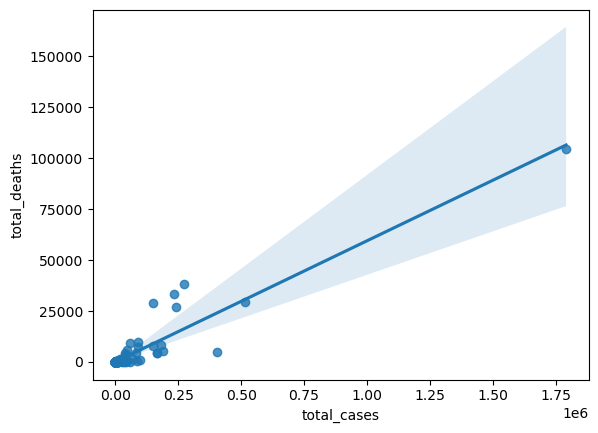

In [107]:
import seaborn as sns
# check the off diagonal elements in the original dataframe
covidtotalsonly.loc[(covidtotalsonly.total_cases_q == "very high") & (covidtotalsonly.total_deaths_q == "medium")].T

# plot a regression line to visualize the bivariate relationship (regplot)
ax = sns.regplot(x = "total_cases", y = "total_deaths", data = covidtotals)

In [108]:
# Using subsetting
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)

nls97.loc[:, "weeksworked12":"weeksworked17"].head(3).T
nls97.loc[:, "colenroct09":"colenrfeb14"].head(3).T

# show individuals with wage income but no weeks worked
nls97.loc[(nls97.weeksworked16==0) & nls97.wageincome>0, ['weeksworked16','wageincome']]

,weeksworked16,wageincome
personid,,
102625,0.00,"1,200.00"
109403,0.00,"5,000.00"
118704,0.00,"25,000.00"
130701,0.00,"12,000.00"
131151,0.00,"65,000.00"
...,...,...
957344,0.00,"90,000.00"
966697,0.00,"65,000.00"
969334,0.00,"5,000.00"


In [115]:
# Selecting first element of the string object
nls97.filter(like="colenr").apply(lambda x: x.str[0:1]).head(2).T

personid,100061,100139
colenrfeb97,1. Not enr,NaN
colenroct97,1. Not enr,1. Not enr
colenrfeb98,1. Not enr,1. Not enr
colenroct98,1. Not enr,1. Not enr
colenrfeb99,1. Not enr,1. Not enr
...,...,...
colenroct15,1. Not enr,1. Not enr
colenrfeb16,1. Not enr,1. Not enr
colenroct16,1. Not enr,1. Not enr
colenrfeb17,1. Not enr,1. Not enr


In [117]:
# Using "any" command to check if there is atleast one true along the axis
# Any can be used to check for illogical instance, here it is used to check whether any of the rows have 4 and not 3
# 'any' over here is used to check for illogical relations between two or more variables
nobach = nls97.loc[nls97.filter(like="colenr").apply(lambda x: x.str[0:1]==
    '4').any(axis=1) &
        ~nls97.filter(like="colenr").
            apply(lambda x: x.str[0:1]=='3').any(axis=1), "colenrfeb97":"colenroct17"]


In [119]:
# Keep in mind that axis has to be only mentioned once

nobach = nls97.loc[nls97.filter(like="colenr").\
  apply(lambda x: x.str[0:1]=='4').\
  any(axis=1) & ~nls97.filter(like="colenr").\
  apply(lambda x: x.str[0:1]=='3').\
  any(axis=1), "colenrfeb97":"colenroct17"]
len(nobach)
nobach.head(3).T

personid,153051,154535,184721
colenrfeb97,NaN,NaN,NaN
colenroct97,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb98,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct98,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb99,1. Not enrolled,1. Not enrolled,1. Not enrolled
...,...,...,...
colenroct15,1. Not enrolled,4. Graduate program,NaN
colenrfeb16,1. Not enrolled,4. Graduate program,NaN
colenroct16,1. Not enrolled,4. Graduate program,NaN
colenrfeb17,1. Not enrolled,4. Graduate program,NaN


In [120]:
# A quick look at what the any function does
nls97.filter(like="colenr").\
  apply(lambda x: x.str[0:1]=='4').\
  any(axis=1)

personid
100061    False
100139    False
100284    False
100292    False
100583    False
          ...  
999291    False
999406    False
999543    False
999698    False
999963     True
Length: 8984, dtype: bool

In [122]:
nls97.highestdegree.value_counts(sort=False)
no4yearenrollment = nls97.loc[nls97.highestdegree.str[0:1].\
  isin(['4','5','6','7']) & ~nls97.filter(like="colenr").\
  apply(lambda x: x.str[0:1]=='3').\
  any(axis=1), "colenrfeb97":"colenroct17"]
len(no4yearenrollment)
no4yearenrollment.head(3).T

personid,113486,118749,124616
colenrfeb97,1. Not enrolled,NaN,1. Not enrolled
colenroct97,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb98,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct98,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb99,1. Not enrolled,1. Not enrolled,1. Not enrolled
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled,1. Not enrolled
colenroct16,NaN,1. Not enrolled,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled,1. Not enrolled


In [123]:
# show individuals with wage income more than three standard deviations greater than or less than the mean
highwages = nls97.loc[nls97.wageincome > nls97.wageincome.mean()+(nls97.wageincome.std()*3),['wageincome']]
highwages

,wageincome
personid,
131858,"235,884.00"
133619,"235,884.00"
151863,"235,884.00"
164058,"235,884.00"
164897,"235,884.00"
...,...
964406,"235,884.00"
966024,"235,884.00"
976141,"235,884.00"


In [128]:
# Using multiple conditionals within the row part using looc
workchanges = nls97.loc[~nls97.loc[:,
  "weeksworked12":"weeksworked16"].mean(axis=1).\
  between(nls97.weeksworked17*0.5,nls97.weeksworked17*2) \
  & ~nls97.weeksworked17.isnull(), 
  "weeksworked12":"weeksworked17"]
len(workchanges)
workchanges.head(7).T

InvalidIndexError: (personid
100061    False
100139    False
100284     True
100292    False
100583    False
          ...  
999291    False
999406    False
999543    False
999698     True
999963    False
Length: 8984, dtype: bool, slice('weeksworked12', 'weeksworked17', None))

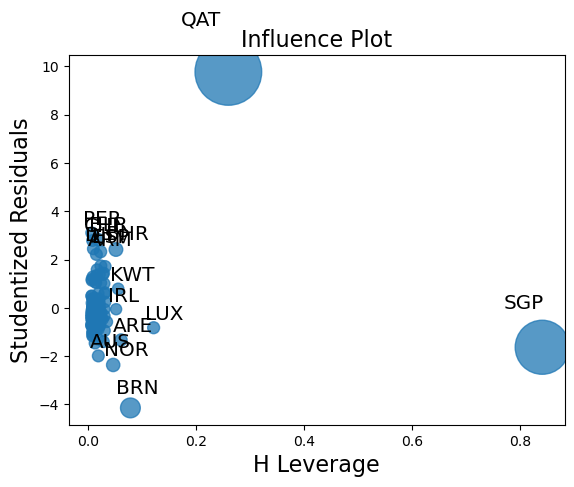

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_cases_pm   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     41.46
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           4.16e-20
Time:                        15:49:26   Log-Likelihood:                -1455.9
No. Observations:                 172   AIC:                             2920.
Df Residuals:                     168   BIC:                             2932.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             23.2490    349.194      0.067      0.947    -666.124     712.622
pop_density        0.6852      0.344      1.989      0.048       0.005       1.365
median_age        -4.6299     13.568     -0.341      0.733     -31.415      22.155
gdp_per_capita     0.0566      0.007      7.996      0.000       0.043       0.071
==============================================================================
Omnibus:                       49.511   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.477
Skew:                           1.269   Prob(JB):                     6.21e-25
Kurtosis:                       6.019   Cond. No.                     9.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
# import pandas, numpy, matplotlib, statsmodels, and load the covid totals data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.width', 85)
pd.options.display.float_format = '{:,.0f}'.format
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

# create an analysis file
xvars = ['pop_density','median_age','gdp_per_capita']

covidanalysis = covidtotals.loc[:,['total_cases_pm'] + xvars].dropna()
covidanalysis.describe()

# fit a linear regression model
def getlm(df, xvars, target):
    """Computes OLS fit and returns the object

    Args:
        df (pd.DataFrame): input dataframe
        xvars (list): list with column names

    Returns:
        statsmodels: returns fitted object
    """
    Y = df[target]
    X = df[xvars]
    X = sm.add_constant(X)
    return sm.OLS(Y, X).fit()

lm = getlm(covidanalysis, xvars,"total_cases_pm")
lm.summary()

# identify countries with an outsized influence on the model
influence = lm.get_influence().summary_frame()
influence.loc[influence.cooks_d>0.5, ['cooks_d']]
covidanalysis.loc[influence.cooks_d>0.5]

# do an influence plot
fig, ax = plt.subplots()
sm.graphics.influence_plot(lm, ax = ax, criterion="cooks")
plt.show()

# show a model without the outliers
covidanalysisminusoutliers = covidanalysis.loc[influence.cooks_d<0.5]

lm = getlm(covidanalysisminusoutliers, xvars, "total_cases_pm")
lm.summary()

In [135]:
covidanalysis.isnull().sum()

total_cases_pm    0
pop_density       0
median_age        0
gdp_per_capita    0
dtype: int64

In [138]:
# import pandas, pyod, and sklearn # Using pyod outlier detection knn based on contamination (proportion of outliers in the data)
import pandas as pd
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

# create a standardized dataset of the analysis variables

standardizer = StandardScaler()
analysisvars = ['location','total_cases_pm','total_deaths_pm',\
  'pop_density','median_age','gdp_per_capita']
covidanalysis = covidtotals.loc[:, analysisvars].dropna()
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])

# run the KNN model and generate anomaly scores
clf_name = 'KNN'
clf = KNN(contamination=0.1)
clf.fit(covidanalysisstand)
y_pred = clf.labels_
y_scores = clf.decision_scores_

# show the predictions from the model
pred = pd.DataFrame(zip(y_pred, y_scores), 
  columns=['outlier','scores'], 
  index=covidanalysis.index)
pred.sample(10, random_state=1)
pred.outlier.value_counts()
pred.groupby(['outlier'])[['scores']].agg(['min','median','max'])

# show covid data for the outliers
covidanalysis.join(pred).loc[pred.outlier==1,\
  ['location','total_cases_pm','total_deaths_pm','scores']].\
  sort_values(['scores'], ascending=False)

,location,total_cases_pm,total_deaths_pm,scores
iso_code,,,,
SGP,Singapore,"5,962.73",3.93,11.98
QAT,Qatar,"19,753.15",13.19,7.99
BEL,Belgium,"5,037.35",816.85,3.55
BHR,Bahrain,"6,698.47",11.17,3.28
LUX,Luxembourg,"6,418.78",175.73,2.46
ESP,Spain,"5,120.95",580.20,2.19
KWT,Kuwait,"6,332.42",49.64,2.13
GBR,United Kingdom,"4,047.40",566.97,2.11
ITA,Italy,"3,853.99",552.66,2.11


In [ ]:
# Visualization using histograms